<a href="https://colab.research.google.com/github/wass2508/Aprovisionamiento_compensacion_laboral_WASS/blob/main/Proyecto_I_Aprovisionamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APROVISIONAMIENTO DE RESERVAS - COMPENSACIÓN LABORAL

El presente proyecto supone el negocio de una aseguradora que cubre la línea de “Compensación Laboral”, el cual se centra en proporcionar cobertura de seguro para lesiones y enfermedades relacionadas con el trabajo que puedan afectar a los empleados de una empresa. Esta forma de seguro está diseñada para proteger tanto a los trabajadores como a los empleadores en caso de accidentes laborales o enfermedades ocupacionales.

El proyecto de ciencia de datos se llevará a cabo para desarrollar un modelo que mejore la precisión en la estimación de las reservas y ayude a la aseguradora a tomar decisiones informadas en términos de provisiones financieras.

El proyecto se centrará en el desarrollo de un modelo predictivo utilizando técnicas de ciencia de datos y aprendizaje automático para estimar las reservas requeridas para las reclamaciones de compensación de trabajadores.

## Data Understanding

### Recolección de los datos Iniciales
Los datos utilizados en este proyecto fueron obtenidos de la página oficial de la CAS (Casualty Actuarial Society). Fueron elaborados por Glenn G. Meyers, PhD, FCAS, con la intención de crear un conjunto de datos organizado y limpio que contenga información sobre las pérdidas (reclamaciones) a lo largo del tiempo, dispuestas en una estructura conocida como "loss triangle" o "triángulo de pérdidas". Este conjunto de datos se creó con el propósito de ser utilizado en estudios de reservas de reclamaciones.

Una "**loss triangle**" (triángulo de pérdidas) es una estructura de datos utilizada en la ciencia actuarial para representar y analizar los patrones de reclamaciones de seguros a lo largo del tiempo. Cada celda de la matriz representa el número de reclamaciones o el monto de las reclamaciones en un período específico, generalmente en función de la edad de la póliza y la duración de la reclamación.

Los datos de reclamaciones provienen del Anexo P: Análisis de pérdidas y gastos de pérdidas en la base de datos de la National Association of Insurance Commissioners (NAIC). Se tuvo el permiso de la NAIC para poner a disposición pública estos datos.

El Anexo P de la NAIC contiene información sobre reclamaciones de las principales líneas personales y comerciales para todas las aseguradoras de propiedad y accidentes que realizan negocios en EE. UU. Algunas partes tienen secciones que separan las coberturas de ocurrencia de reclamos realizados. Las seis líneas incluidas en esta base de datos son: (1) responsabilidad civil/médica de automóviles de pasajeros privados; (2) responsabilidad médica/de automóviles comerciales/camiones; (3) compensación laboral; (4) negligencia médica – reclamaciones realizadas; (5) otra responsabilidad – ocurrencia; (6) responsabilidad del producto – ocurrencia.

#### Consideraciones en la preparación de los datos
Los triángulos consisten en pérdidas netas de reaseguro y, muy a menudo, los grupos aseguradores tienen acuerdos mutuos de reaseguro entre las empresas del grupo. En consecuencia, la preparación se centró en los registros de entidades individuales en la preparación de datos, ya sean grupos de aseguradores o aseguradores individuales verdaderos. El proceso de preparación de datos tomó tres pasos:

**Paso I**:  Extraer los datos del triángulo del Anexo P del año 1997. Cada triángulo incluye reclamaciones de 10 años de accidentes (1988-1997) y 10 retrasos en el desarrollo. Estos datos son los datos de entrenamiento que se pueden utilizar para el desarrollo del modelo.

**Paso II**:  Cuadrar los triángulos del Anexo P del año 1997 con los resultados del Anexo P de años posteriores. Específicamente, los datos del año de accidente 1989 se extrajeron del Anexo P del año 1998, los datos del año de accidente 1990 se extrajeron del Anexo P del año 1999, ……, los datos del año de accidente 1997 se extrajeron del Anexo P del año 2006. Los datos de los triángulos inferiores se pueden utilizar con fines de validación del modelo.

**Paso III**:  Muestreo. Realizamos un análisis preliminar para garantizar la calidad del conjunto de datos. Se retuvo a una aseguradora en el conjunto de datos final si se cumplen los siguientes criterios: (1) la aseguradora está disponible tanto en el Anexo P del año 1997 como en años posteriores; (2) las observaciones (10 años de accidente y 10 retrasos en el desarrollo) están completas para el asegurador; (3) los reclamos del Anexo P del año 1997 coinciden con los de años posteriores; (4) Las primas netas emitidas no son cero para todos los años.

El producto final es un conjunto de datos que contiene triángulos de seis líneas de negocio para todas las aseguradoras de accidentes de propiedad de EE. UU.

Para el caso de este proyecto se seleccionó unicamente la línea ***(3) compensación laboral***.

In [64]:
# Librerías requeridas para el análisis de datos
import numpy as np # Cálculo numérico
import pandas as pd # Estructuras para el análisis de datos
import tabulate # Visualización de datos tabulares en consola
import warnings # Control de advertencias
import os # Interacción con el sistema operativo - Gestión de archivos y directorios
from google.colab import drive # Interacción con Google Drive
import datetime # Manejo de fechas y horas
import seaborn as sns # Visualización de datos
import matplotlib.pyplot as plt # Herramientas para gráficos
#warnings.filterwarnings('ignore')

In [3]:
# Ruta con la fuente de los datos para el análisis
drive.mount('/content/drive/')
proyect_path = '/content/drive/My Drive/Maestría Actuaría y Finanzas - UNAL/Semestre 3/Aplicaciones del Aprendizaje de Maquinas para Actuaria y Finanzas/Proyecto I'
input_name = r'wkcomp_pos.csv' # nombre de la base de datos
input_path = proyect_path+'/'+input_name # Ruta completa base de datos

# Verificar si la ruta existe
root_validation = input_path
if os.path.exists(root_validation):
    print(f"La ruta '{root_validation}' existe.")
else:
    print(f"La ruta '{root_validation}' no existe.")

Mounted at /content/drive/
La ruta '/content/drive/My Drive/Maestría Actuaría y Finanzas - UNAL/Semestre 3/Aplicaciones del Aprendizaje de Maquinas para Actuaria y Finanzas/Proyecto I/wkcomp_pos.csv' existe.


In [4]:
# Traer datos
data = pd.read_csv(input_path, sep = ',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GRCODE             13200 non-null  int64 
 1   GRNAME             13200 non-null  object
 2   AccidentYear       13200 non-null  int64 
 3   DevelopmentYear    13200 non-null  int64 
 4   DevelopmentLag     13200 non-null  int64 
 5   IncurLoss_D        13200 non-null  int64 
 6   CumPaidLoss_D      13200 non-null  int64 
 7   BulkLoss_D         13200 non-null  int64 
 8   EarnedPremDIR_D    13200 non-null  int64 
 9   EarnedPremCeded_D  13200 non-null  int64 
 10  EarnedPremNet_D    13200 non-null  int64 
 11  Single             13200 non-null  int64 
 12  PostedReserve97_D  13200 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


### Descripción de los datos (Revisión de los Metadatos)
El conjunto de datos para este proyecto contiene triángulos de la línea de negocio *Compensación Laboral* para todas las aseguradoras de accidentes de propiedad de EE. UU. Los datos del triángulo corresponden a reclamaciones de accidentes del año 1988 – 1997 con un retraso de 10 años en el desarrollo. Se incluyen los triángulos superior e inferior para que se puedan utilizar los datos para desarrollar un modelo y luego probar su desempeño retrospectivamente. Esta segmentación de los datos será tenida en cuenta en la sección de **Modelación**


In [5]:
# Visualización previa de la estructura de los datos
data.head(3)

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_D,CumPaidLoss_D,BulkLoss_D,EarnedPremDIR_D,EarnedPremCeded_D,EarnedPremNet_D,Single,PostedReserve97_D
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872


#### Descripción de las variables
La base de datos está compuesta por un total 13,200 filas y 13 columnas. Cada fila corresponde al registro por cada aseguradora de las pérdidas, reservas y primas ganadas en cada año. Por su parte las columnas contienen la siguiente información respectivamente:

* 1) **GRCODE**: Código de la compañía NAIC (National Association of Insurance Commissioners), que incluye tanto grupos de aseguradoras como aseguradoras individuales.
+ 2) **GRNAME**: Nombre de la compañía NAIC, que también incluye grupos de aseguradoras y aseguradoras individuales.
- 3) **AccidentYear**: Año de ocurrencia del accidente. Cubre el período de 1988 a 1997.
* 4) **DevelopmentYear**: Año de desarrollo de la reclamación. También abarca el período de 1988 a 1997. Es una medida de cuánto tiempo ha pasado desde que una reclamación fue reportada y se utiliza para evaluar cómo evolucionan las reclamaciones a lo largo de varios años después de su ocurrencia inicial.
+ 5) **DevelopmentLag**: Lag de desarrollo, calculado como "*(AccidentYear - 1987) + (DevelopmentYear - 1987) - 1*". Representa el tiempo transcurrido desde el año de ocurrencia del accidente y el año de desarrollo. Esta medida es esencial en el análisis de las reclamaciones de seguros para comprender cómo evolucionan los costos y los patrones de reclamaciones a lo largo del tiempo.
* 6) **IncurLoss_D**: Pérdidas incurridas y gastos asignados reportados al final del año. Representa la suma de las pérdidas incurridas (lo que espera la aseguradora pagar para cubrir las reclamaciones que ocurrieron durante el año) y los gastos asignados al final del año en cuestión. Esta cifra es una parte importante en la evaluación de la cantidad total de dinero que la aseguradora espera gastar para cubrir las reclamaciones y los costos asociados en ese año específico.
+ 7) **CumPaidLoss_D**: Pérdidas acumuladas pagadas y gastos asignados al final del año. Esto representa la suma total de los pagos realizados por la aseguradora hasta ese momento para cubrir las reclamaciones y los costos asociados. Incluye pagos realizados hasta el momento presente.

Entonces, "**IncurLoss_D**" tiene en cuenta las pérdidas estimadas que se esperan pagar por las reclamaciones ocurridas durante el año, pero que aún no se han pagado en su totalidad. "**CumPaidLoss_D**" refleja los pagos reales ya realizados por la aseguradora hasta ese momento, que pueden ser por reclamaciones que ocurrieron en años anteriores.

+ 8) **BulkLoss_D**: Reservas a granel y IBNR (Incurred But Not Reported) en pérdidas netas y gastos de defensa y costos de contención reportados al final del año. Las reservas a granel son fondos establecidos por una aseguradora para cubrir futuras reclamaciones y costos que aún no se han liquidado completamente. Por otro lado, os IBNR son estimaciones de reclamaciones que se cree que han ocurrido pero aún no han sido reportadas. Finalmente, los gastos de Defensa y Costos de Contención son los costos asociados con la defensa legal y la gestión de las reclamaciones, incluyendo los honorarios legales, los costos de abogados y otros gastos relacionados con la administración y el manejo de reclamaciones.
+ 9) **EarnedPremDIR_D**: Primas devengadas en el año de ocurrencia: directas y asumidas. Son las primas que la aseguradora espera recibir por proporcionar cobertura durante un período específico. Primas recibidas por seguros emitidos directamente por la aseguradora o asumidas (reaseguro).
+ 10) **EarnedPremCeded_D**: Primas devengadas en el año de ocurrencia: cedidas. Cedidas por la aseguradora a otras entidades a través del proceso de reaseguro.
+ 11) **EarnedPremNet_**: Primas devengadas en el año de ocurrencia: netas. Las primas devengadas netas representan los ingresos totales generados por las pólizas de seguros emitidas por la aseguradora en el año en que ocurrieron las reclamaciones, teniendo en cuenta tanto las primas directas como las primas cedidas y asumidas.
+ 12) **Single**: Indica si se trata de una entidad única (1) o una aseguradora de grupo (0). Aseguradoras independientes o parte de un grupo o conglomerado. Esta división es importante a la hora de realizar una evaluación estrategica de las reservas y la gestión de riesgos.
+ 13) **PostedReserve97_D**: Reservas publicadas en el año 1997 tomadas de la Exhibición de Suscripción e Inversión - Parte 2A, incluyendo pérdidas no pagadas netas y gastos no pagados de ajuste de pérdida.

Cada columna está relacionada con información específica sobre las reclamaciones, las primas, las reservas y otros aspectos relevantes para la línea de negocio de *Compensación laboral*.

In [24]:
# Segmentación por tipo de aseguradora
num_aseg = data['GRCODE'].nunique()
num_aseg_ind = data.loc[(data['Single']==1),'GRCODE'].nunique()
num_aseg_grup = data.loc[(data['Single']==0),'GRCODE'].nunique()
des_aseg = f'''Del total de aseguradoras que componen la base de datos de la línea
de compensación laboral ({num_aseg}), {num_aseg_ind} son aseguradoras del tipo
individual o independientes y {num_aseg_grup} pertenecen a un grupo.'''
print(des_aseg)

criterio = ['Total Aseguradoras', 'Aseguradoras Independientes', 'Aseguradoras de Conglomerado']
cantidad_aseg = [num_aseg, num_aseg_ind, num_aseg_grup]
resumen_aseguradoras = pd.DataFrame({'Tipo': criterio, 'Cantidad':cantidad_aseg})
resumen_aseguradoras

Del total de aseguradoras que componen la base de datos de la línea 
de compensación laboral (132), 96 son aseguradoras del tipo 
individual o independientes y 36 pertenecen a un grupo.


,Tipo,Cantidad
0,Total Aseguradoras,132
1,Aseguradoras Independientes,96
2,Aseguradoras de Conglomerado,36


In [18]:
# Nombre de las aseguradoras Independientes
name_aseg_independientes = data.loc[(data['Single']==1),'GRNAME'].unique()
#print(name_aseg_independientes)

# Nombre de las aseguradoras parte de un Conglomerado
name_aseg_grupo = data.loc[(data['Single']==0),'GRNAME'].unique()
print(name_aseg_grupo)

['Allstate Ins Co Grp' 'California Cas Grp' 'Celina Mut Grp'
 'Federal Ins Co Grp' 'Buckeye Ins Grp' 'FM Global'
 'Farm Bureau Of MI Grp' 'Patrons Grp' 'West Bend Mut Ins Grp'
 'Secura Ins Co' 'Island Ins Cos Grp' 'Kentucky Farm Bureau Mut Ins Grp'
 'Shelter Ins Cos Grp' 'Penn Miller Grp' 'Farmers Automobile Grp'
 'State Farm Mut Grp' 'Erie Ins Exchange Grp'
 'Farmers Alliance Mut & Affiliates' 'Canal Ins Co Grp'
 'Pennsylvania Natl Ins Grp' 'Horace Mann Grp' 'Preferred Risk Mut Grp'
 'NC Farm Bureau Ins Grp' 'FL Farm Bureau Grp' 'Capitol Transamerican Grp'
 'Grinnell Mut Grp' 'American Contractors Ins Grp' 'Mutual Benefit Grp'
 'Amerisafe Grp' 'New Jersey Manufacturers Grp' 'Keystone Ins Grp'
 'Commerce Grp Inc' 'Farm Bureau Grp' 'Millers Mut Ins Assoc'
 'Protective Ins Grp' 'Lumber Ins Cos']


### Exploración de los datos


#### Estadísticas Descriptivas
Se calculan estadísticas descriptivas para comprender la distribución de los valores en cada variable. Esto incluye medidas como la media, la mediana, la desviación estándar y los percentiles.

In [62]:
# Estadísticas descriptivas de las variables temporalidad y clasificación
#data.shape
#data.columns
est_desc1 = data.describe()[['AccidentYear', 'DevelopmentYear','DevelopmentLag', 'Single']]
est_desc1= round(est_desc1.drop(['std','25%','50%','75%','mean']).T)
est_desc1

,count,min,max
AccidentYear,13200.0,1988.0,1997.0
DevelopmentYear,13200.0,1988.0,2006.0
DevelopmentLag,13200.0,1.0,10.0
Single,13200.0,0.0,1.0


In [63]:
# Estadísticas descriptivas de las variables reservas, pérdidas y primas
#data.shape
#data.columns
est_desc = data.describe().drop(columns=['GRCODE', 'AccidentYear', 'DevelopmentYear','DevelopmentLag', 'Single'])
est_desc = round(est_desc.drop('count').T,2)
est_desc

,mean,std,min,25%,50%,75%,max
IncurLoss_D,11532.05,35595.56,-59.0,0.0,544.0,6526.50,367404.0
CumPaidLoss_D,8215.74,25714.08,-338.0,0.0,351.5,4565.00,325322.0
BulkLoss_D,1570.13,7259.02,-4621.0,0.0,5.0,259.25,145296.0
EarnedPremDIR_D,18438.47,51830.70,-6518.0,0.0,1419.0,11354.25,421223.0
EarnedPremCeded_D,1812.34,6666.66,-3522.0,0.0,144.5,1141.00,78730.0
EarnedPremNet_D,16626.13,48941.72,-9731.0,0.0,827.0,9180.50,418755.0
PostedReserve97_D,39714.40,130130.68,0.0,411.0,2732.0,19265.75,1090093.0


#### Diagramas de caja (Boxplots)
Visualizaciones que ayuden a identificar outliers

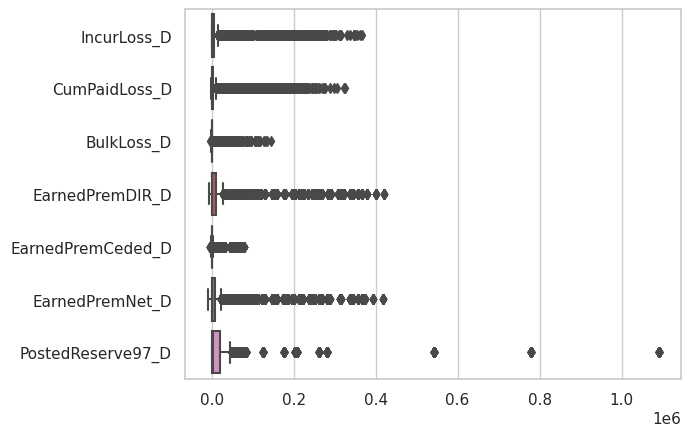

In [81]:
# Boxplots de las variables númericas
sns.set(style="whitegrid")  # Estilo del gráfico
# se filtraron los datos por las columnas de reservas, pérdidas y primas
data_box = data.drop(columns=['GRCODE', 'AccidentYear', 'DevelopmentYear','DevelopmentLag', 'Single'])
sns.boxplot(data=data_box, orient="h") # Boxplots
plt.show()

De las anteriores estadísticas descriptivas y los gráficos de boxplot podemos concluir que los datos de las reservas se encuentran bastante dispersos, lo cual se justifica debido a la discrepancia de tamaño entre las aseguradoras.

In [76]:
# Aseguradoras con reservas superiores a los $100 mil dólares
data.loc[data['PostedReserve97_D']>100000,'GRNAME'].unique()

array(['Allstate Ins Co Grp', 'California Cas Grp', 'Federal Ins Co Grp',
       'State Farm Mut Grp', 'Erie Ins Exchange Grp',
       'Pennsylvania Natl Ins Grp', 'New Jersey Manufacturers Grp',
       'Lumbermens Underwriting Alliance', 'Beacon Mut Ins Co'],
      dtype=object)

In [78]:
data.columns

Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D', 'EarnedPremDIR_D',
       'EarnedPremCeded_D', 'EarnedPremNet_D', 'Single', 'PostedReserve97_D'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot EarnedPremCeded_D')

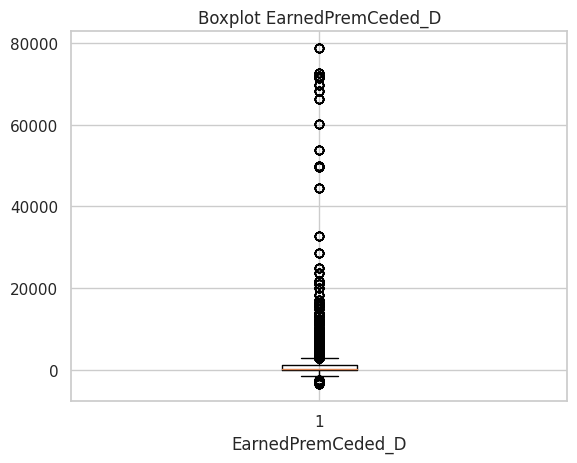

In [88]:
# Boxplot por variable
name_column = 'EarnedPremCeded_D' # nombre de la columna
plt.boxplot(data[name_column], vert=True)
plt.xlabel(name_column)
#plt.ylabel('Valores')
plt.title(f'Boxplot {name_column}')

#### Histogramas
Visualizaciones que ayuden a identificar patrones y relaciones.

In [95]:
data_box.columns

Index(['GRNAME', 'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D',
       'EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D',
       'PostedReserve97_D'],
      dtype='object')

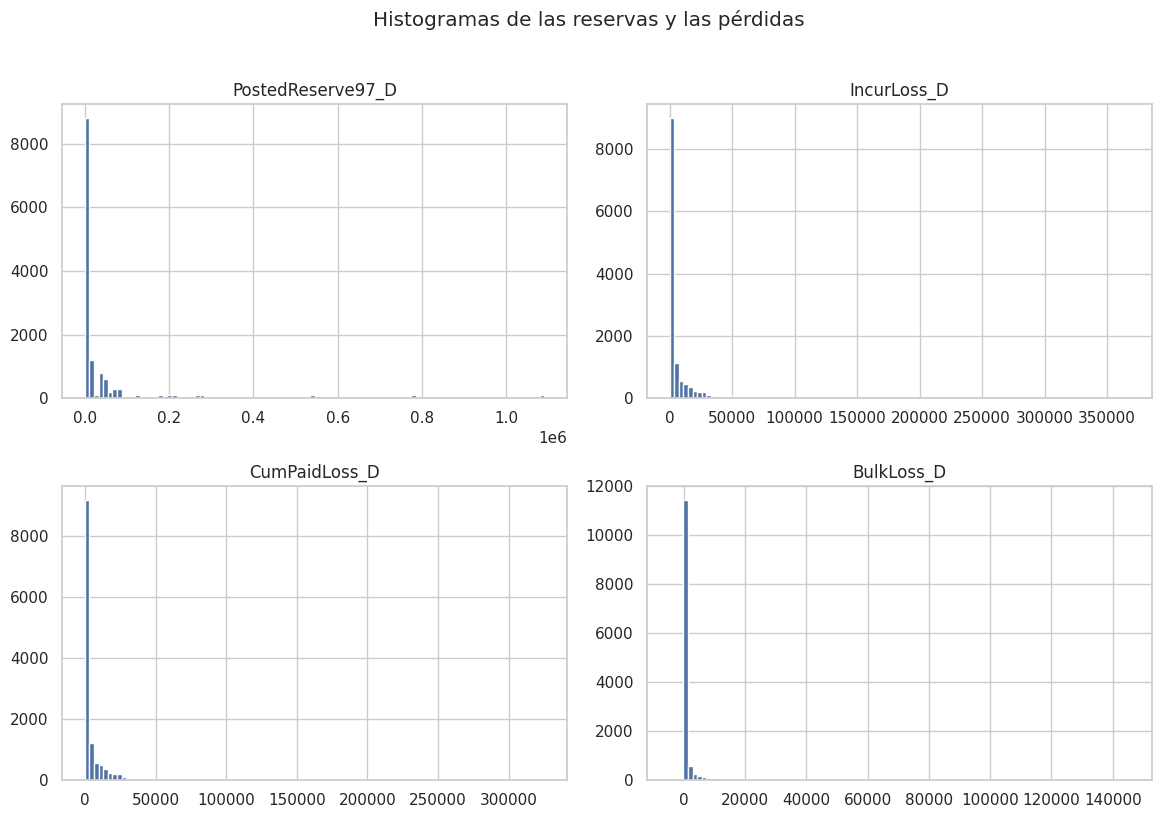

In [105]:
data_box[['PostedReserve97_D','IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D']].hist(figsize=(12, 8), bins=100)
plt.suptitle("Histogramas de las reservas y las pérdidas", y=1.02)
plt.tight_layout()
plt.show()

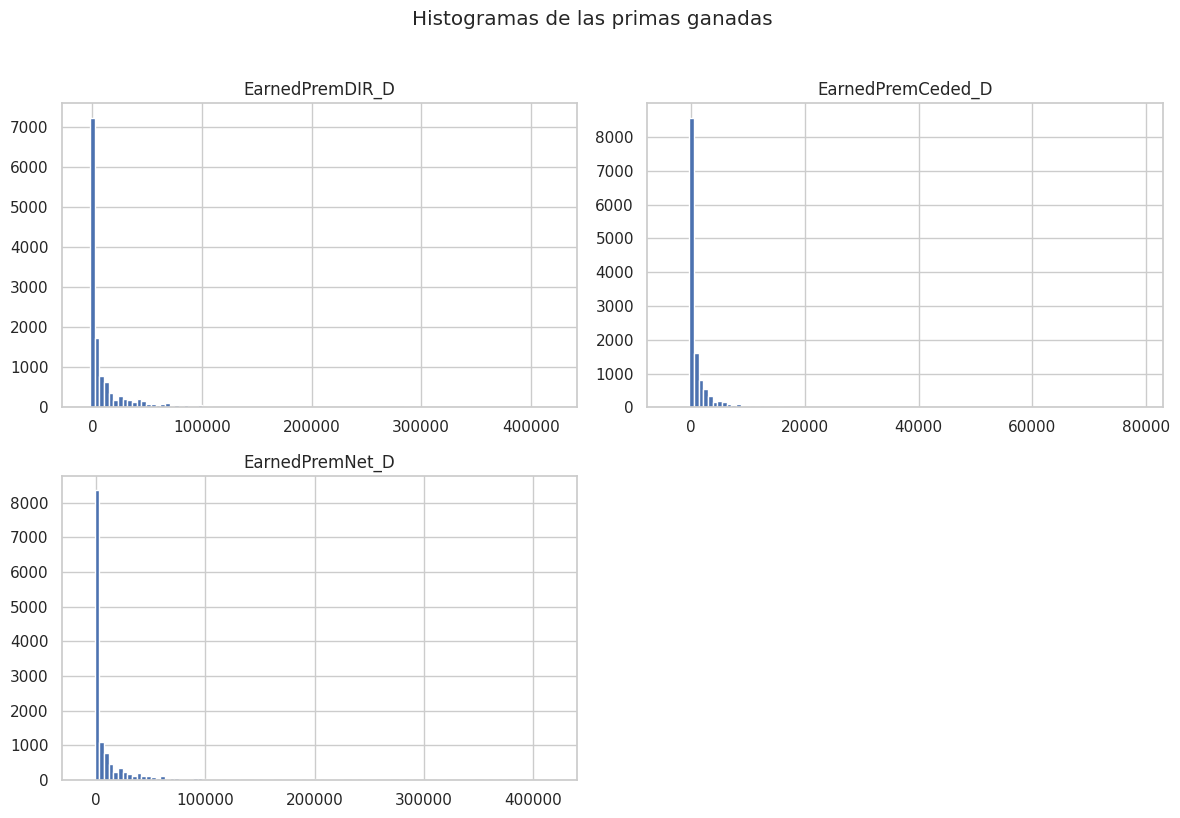

In [103]:
data_box[['EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D']].hist(figsize=(12, 8), bins=100)
plt.suptitle("Histogramas de las primas ganadas", y=1.02)
plt.tight_layout()
plt.show()

In [109]:
data_box.columns

Index(['GRNAME', 'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D',
       'EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D',
       'PostedReserve97_D'],
      dtype='object')

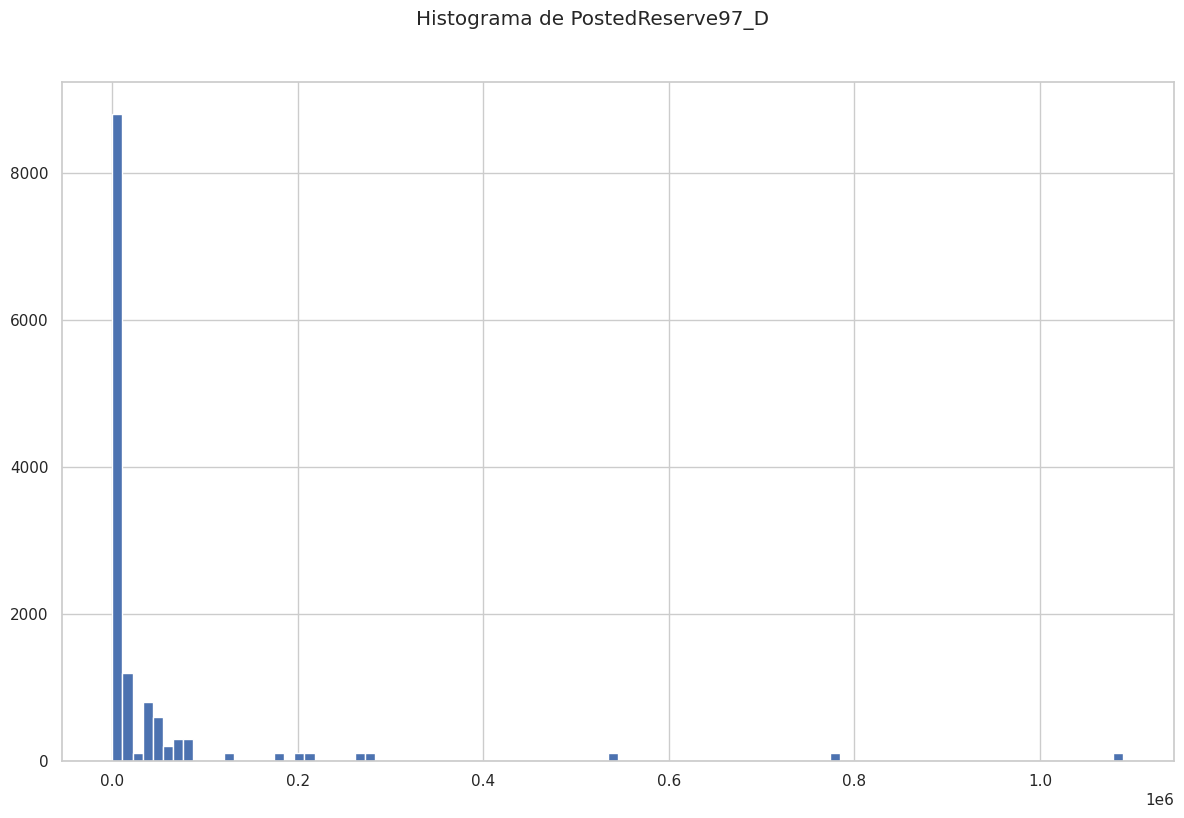

In [107]:
# Histograma por columna
name_column = 'PostedReserve97_D'
data_box[name_column].hist(figsize=(12, 8), bins=100)
plt.suptitle(f'Histograma de {name_column}', y=1.02)
plt.tight_layout()
plt.show()

De estos gráficos podemos decir que todas las variables tienen una distribución sesgada a la derecha, por lo que para su modelamiento se pueden suponer distribuciones de probabilidad como la Pareto, Lognormal, Gamma o Weibull.  

#### Correlaciones entre las variables
Se analizan las relaciones entre diferentes variables para identificar posibles correlaciones o dependencias.

<ipython-input-113-c13572b746b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_box.corr()


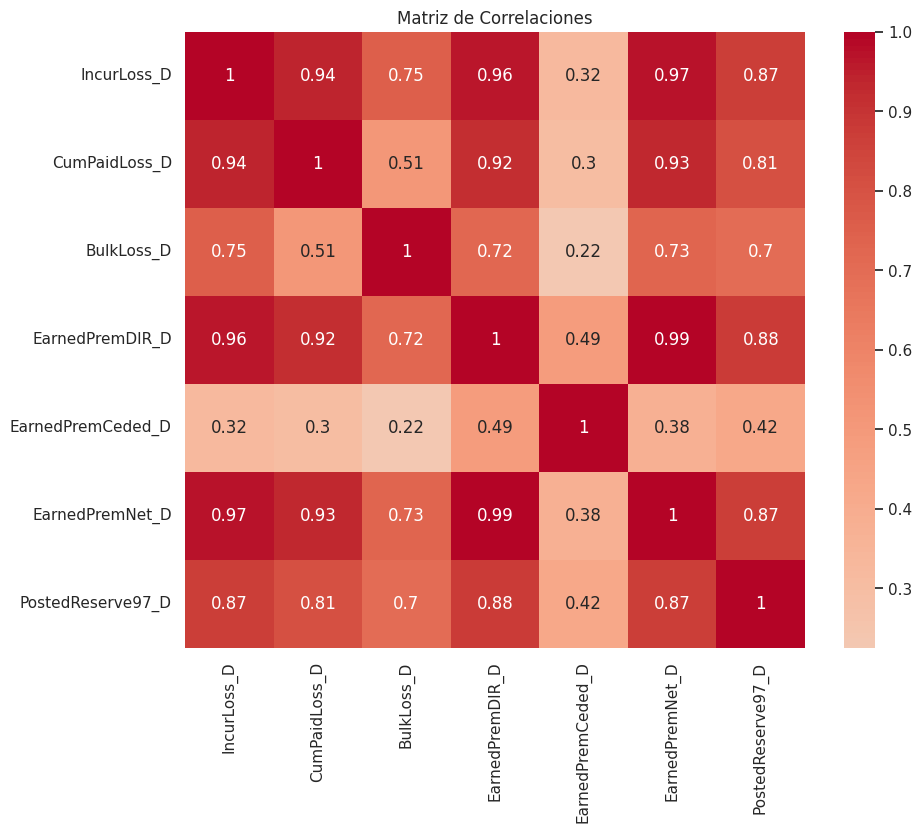

In [113]:
# Calculo de la matriz de correlaciones
correlation_matrix = data_box.corr()
# Gráfico de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlaciones")
plt.show()

In [114]:
data_box.columns

Index(['GRNAME', 'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D',
       'EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D',
       'PostedReserve97_D'],
      dtype='object')

De estos datos podemos concluir que hay una fuerte relación lineal entre las variables '*IncurLoss_D*', 'CumPaidLoss_D', 'EarnedPremDIR_D', 'EarnedPremNet_D' y 'PostedReserve97_D'. Es decir, hay una fuerte dependencia entre las Pérdidas incurridas, las pérdidas acumuladas pagadas, las primas gaandas y las reservas de las aseguradoras.

### Verificar la calidad de los datos
Se evalúa la calidad de los datos en términos de integridad, consistencia y posibles problemas como valores faltantes o datos incorrectos.

#### Valores faltantes

In [117]:
# Validar si hay algun valor nulo o vacio en el data frame
nulos = data.isnull().any().sum()
print(f'Hay un total de {nulos} valores vacíos o nulos en la base de datos')

Hay un total de 0 valores vacíos o nulos en la base de datos


Por otro lado, de acuerdo a los gráficos anteriores observamos que hay una dispersión grande en los datos de todas las variables, distribuidos de forma asimétrica a la derecha, lo cual es justificado y tiene relación por la concentración de reclamaciones pequeñas y menos frecuentes reclamaciones grandes. Esto es común en seguros, donde un pequeño número de reclamaciones grandes puede tener un impacto significativo en las reservas.

## Preparación de los datos

## Modelación

## Evaluación de modelo